In [1]:
import pandas as pd

my_file = '/home/bakunobu/data_comp/kaggle_titanic/dataset/train.csv'

In [2]:
data = pd.read_csv(my_file)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Таблица содержит информацию о 891 объекте - по 12 признаков для каждого экземпляра.  
Большая часть данных не содержит попусков, однако их достаточно много для столбцов Cabin (каюта) и Age (возраст). Несколько значений пропущено для признака Embarked.
Как эти данные можно восстановить:
* для возраста - посмотреть, есть ли пересечения с другими пассажирами в графе Name (для этого нужно разбить и выделить фамилии, чтобы на основании родства делать предположение о возрасте), наличия родственников (есть ли среди них взрослые), есть ли информация о других пассажирах в каюте и признаку наличия детей/родителей;
* для каюты (не знаю, наскольо этот признак важен) - на основании родства и общей каюты, цены билета;
* для порта отправления (судя по всему, неважный признак) - на основании цены билета и класса.

In [4]:
data['Name'].value_counts() # бесполезная информация  

Andrews, Mr. Thomas Jr                                 1
Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)    1
Renouf, Mr. Peter Henry                                1
Skoog, Mrs. William (Anna Bernhardina Karlsson)        1
Bowen, Mr. David John "Dai"                            1
                                                      ..
Thayer, Mr. John Borland                               1
Odahl, Mr. Nils Martin                                 1
Turkula, Mrs. (Hedwig)                                 1
Slocovski, Mr. Selman Francis                          1
Foo, Mr. Choong                                        1
Name: Name, Length: 891, dtype: int64

In [5]:
 data['Sex'].value_counts() # есть дисбаланс классов, попробовать его учесть при формировании выборок 

male      577
female    314
Name: Sex, dtype: int64

In [6]:
data['Ticket'].value_counts() # похоже, по некоторым билетам проходили несколько человек (это семейный тариф?)

1601                  7
CA. 2343              7
347082                7
CA 2144               6
3101295               6
                     ..
C.A. 34260            1
14973                 1
236171                1
SC/PARIS 2131         1
SOTON/O.Q. 3101311    1
Name: Ticket, Length: 681, dtype: int64

In [7]:
 data['Cabin'].value_counts() # да, люди, селились по несколько в одну каюту. Возможно, это тоже признак

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
B30            1
A26            1
C86            1
A7             1
A19            1
Name: Cabin, Length: 147, dtype: int64

In [8]:
data['Embarked'].value_counts() # тут без сюрпризов. Возможно это влияет на цену билета и на установление родства

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


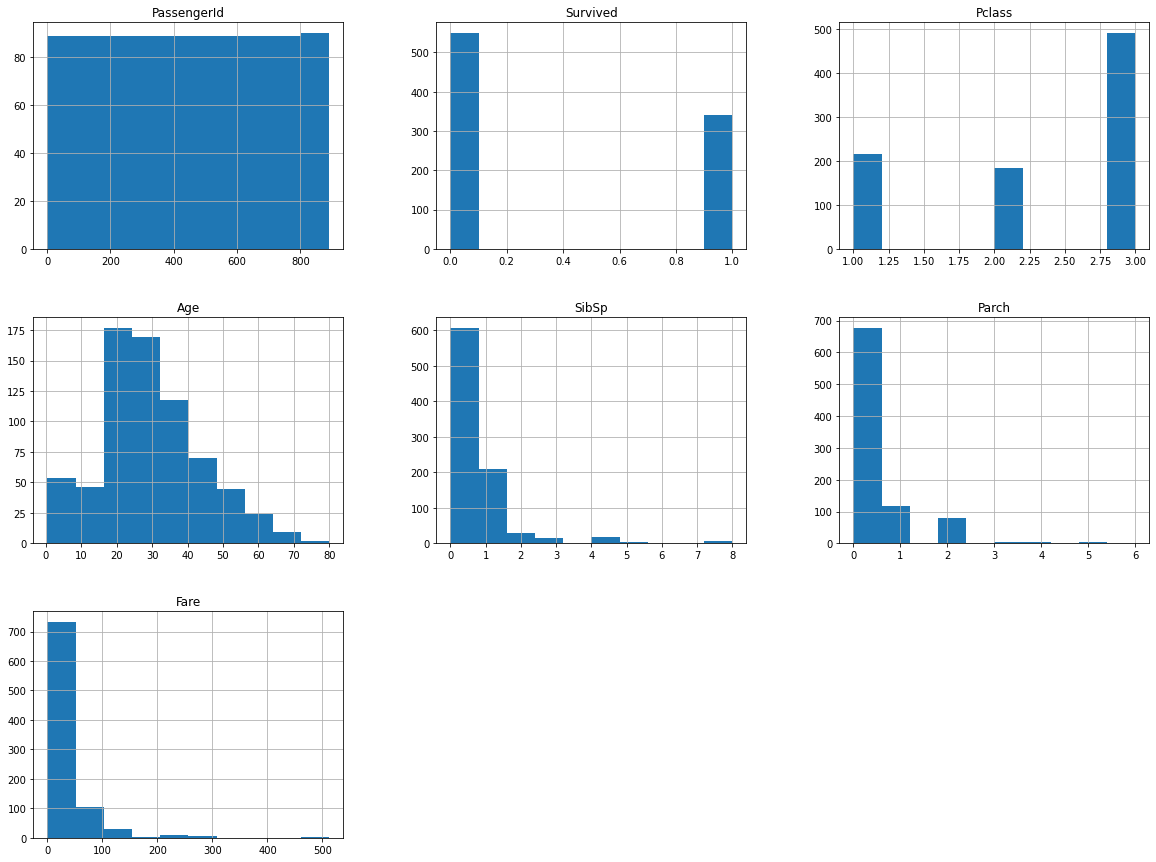

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(20,15))
plt.show()